In [32]:
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv("../Data/HistoricalCryptos/ETH.csv")

In [60]:
data["returns"] = (data["close"]-data["close"].shift(1))/data["close"].shift(1)
#clip the returns to remove outliers
data['returns'] = data['returns'].clip(-0.25,0.25)
ethReturns = data.filter(['date', 'returns'])

In [61]:
# Ensure 'date' column is in datetime format
ethReturns['date'] = pd.to_datetime(ethReturns['date'])
# Set 'date' as the index
ethReturns.set_index('date', inplace=True)

Text(0.5, 1.0, 'ETH-USD returns')

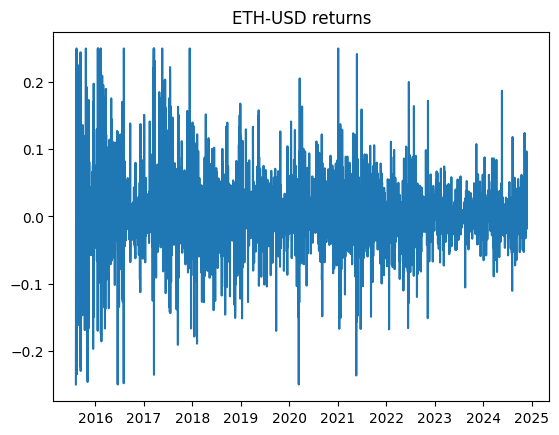

In [62]:
plt.plot(ethReturns.index, ethReturns['returns'])
plt.title('ETH-USD returns')

In [63]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  # Set range [-1, 1]

In [64]:
ethReturns['scaled_returns'] = scaler.fit_transform(ethReturns[['returns']])

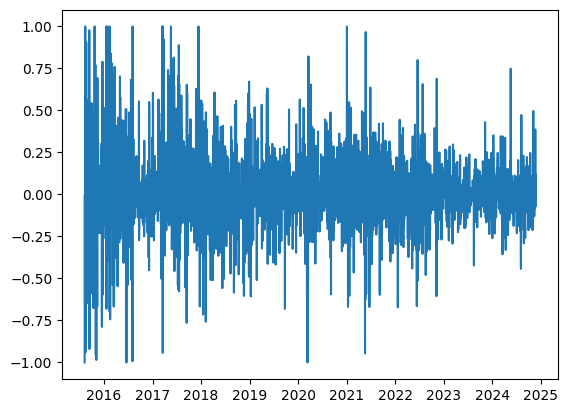

In [65]:
plt.plot(ethReturns.index, ethReturns['scaled_returns'])

In [66]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to returns
ethReturns['standardized_returns'] = scaler.fit_transform(ethReturns[['returns']])

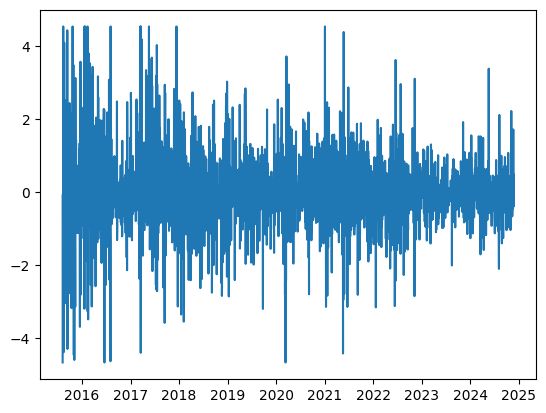

In [67]:
plt.plot(ethReturns.index, ethReturns['standardized_returns'])

In [70]:
from statsmodels.tsa.stattools import adfuller

In [72]:
adfuller(data['returns'].dropna())

(np.float64(-10.684292818917939),
 np.float64(3.868736547691245e-19),
 19,
 3376,
 {'1%': np.float64(-3.432288471305038),
  '5%': np.float64(-2.8623965040462114),
  '10%': np.float64(-2.5672259336640293)},
 np.float64(-10188.831654282498))

(array([  12.,   23.,   58.,  249., 1324., 1282.,  300.,   88.,   36.,
          24.]),
 array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25]),
 <BarContainer object of 10 artists>)

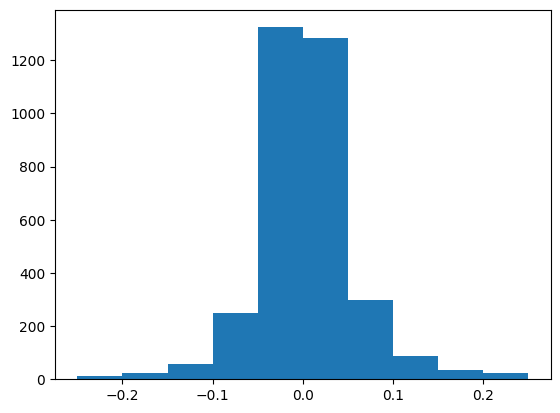

In [75]:
plt.hist(data['returns'])